In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkerisen/wind-turbine-scada-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wind-turbine-scada-dataset' dataset.
Path to dataset files: /kaggle/input/wind-turbine-scada-dataset


In [3]:
# Importing Necessary Libraries

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import seaborn as sns

import joblib

In [6]:
import os

# List contents of the downloaded directory to find the CSV file
file_names = os.listdir(path)

# Assuming there's only one CSV file in the directory, or we can infer the name
# A common name for the dataset's main CSV is 'wind_turbine_scada.csv' or similar.
# Let's find the first file ending with .csv
csv_file = [f for f in file_names if f.endswith('.csv')][0]

# Construct the full path to the CSV file
full_csv_path = os.path.join(path, csv_file)

df = pd.read_csv(full_csv_path)

In [10]:
df.rename(columns={'Date/Time':'Time','LV ActivePower (kW)': 'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"}, inplace=True)
df['Time'] = pd.to_datetime(df['Time'], format='%d %m %Y %H:%M')

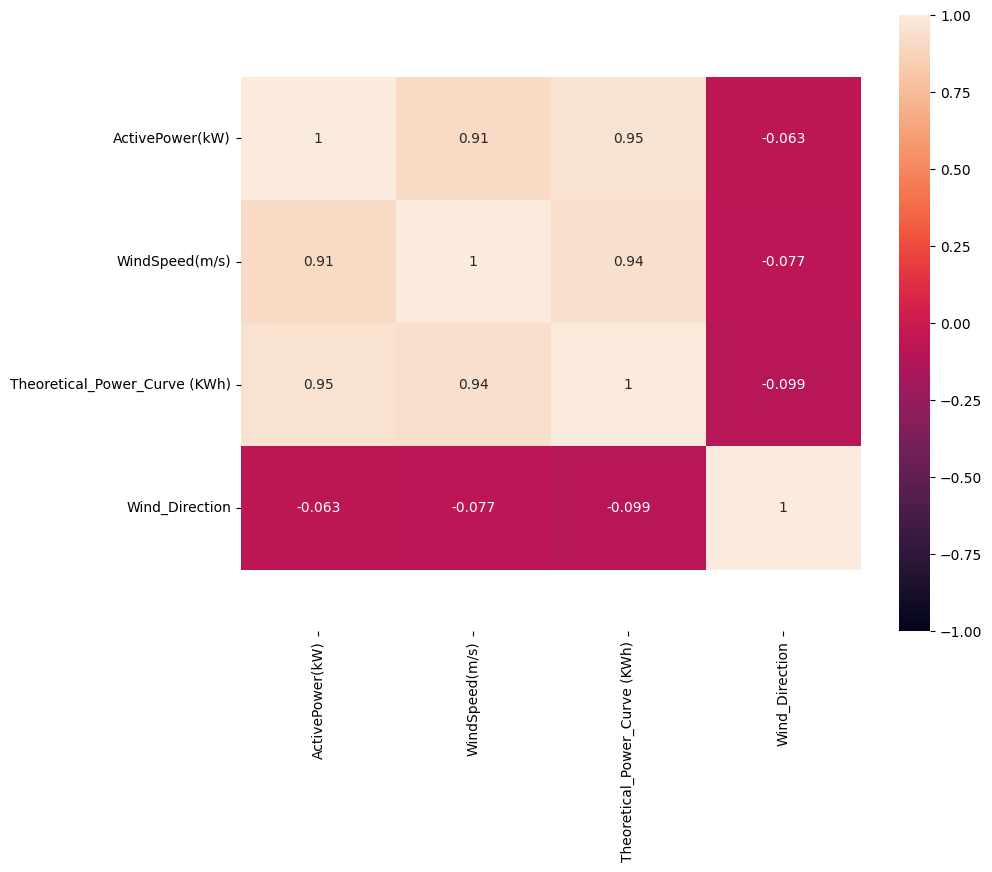

                               ActivePower(kW)  WindSpeed(m/s)  \
ActivePower(kW)                       1.000000        0.912774   
WindSpeed(m/s)                        0.912774        1.000000   
Theoretical_Power_Curve (KWh)         0.949918        0.944209   
Wind_Direction                       -0.062702       -0.077188   

                               Theoretical_Power_Curve (KWh)  Wind_Direction  
ActivePower(kW)                                     0.949918       -0.062702  
WindSpeed(m/s)                                      0.944209       -0.077188  
Theoretical_Power_Curve (KWh)                       1.000000       -0.099076  
Wind_Direction                                     -0.099076        1.000000  


In [11]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

print(corr)

In [12]:
# The heat map clearly tells us that there's no realtion between wind direction and

# the Power generated but Wind speed, Theoritical power and Actual power generated

# have a very positive correlation

#df.drop(['Wind_Direction'], axis=1,inplace = True)

df["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H:%M", errors = "coerce")

In [13]:
#Splitting the Data into train and test:

y = df['ActivePower(kW)'] #'Theoretical_Power_Curve (KWh)'

X = df [['Theoretical_Power_Curve (KWh)', 'WindSpeed(m/s)']] #'ActivePower (kW)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [15]:
#Importing libraries for Model training and fitting

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

forest_model = RandomForestRegressor(
n_estimators = 750,
max_depth = 4,
max_leaf_nodes =500, random_state=1)

forest_model.fit (train_X, train_y)

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [16]:
#Predicting for Test Data

power_preds = forest_model.predict(val_X)

#Evaluating the score of our model

print(mean_absolute_error(val_y, power_preds))

print(r2_score(val_y,power_preds))

164.58015525861344
0.9113496428907649


In [17]:
#Saving the model for future reference

joblib.dump (forest_model, "power_prediction.sav")

['power_prediction.sav']